In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#some eda i guess
df=pd.read_parquet("../data/processed/sp500.parquet")

In [4]:
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Sector,Industry,...,WR_14,WR_5,CCI_20,CCI_14,ADL,sp500_rv_40d,sp500_rv_80d,sp500_rv_120d,sp500_atr_14d_norm,sp500_obv
0,2004-01-08,A,22.095852,23.118740,22.052933,23.090130,19.367947,7320487.0,Healthcare,Diagnostics & Research,...,-0.751825,-1.129862,-1883.394707,-2101.798065,1.390347e+08,0.006542,0.007560,0.007574,0.007830,4.255047e+10
1,2004-01-09,A,22.961372,23.204578,22.818312,22.925608,19.229952,4026659.0,Healthcare,Diagnostics & Research,...,-8.478284,-12.074334,-1644.977857,-1724.885363,1.372450e+08,0.006754,0.007504,0.007492,0.008038,4.082977e+10
2,2004-01-12,A,22.925608,23.190271,22.603720,23.175966,19.439953,3736854.0,Healthcare,Diagnostics & Research,...,-0.869560,-1.346793,-1471.114554,-1502.242069,1.407996e+08,0.006590,0.007498,0.007460,0.007868,4.233997e+10
3,2004-01-13,A,23.211731,23.319027,22.918455,23.061516,19.343950,5497635.0,Healthcare,Diagnostics & Research,...,-7.659590,-15.652208,-1333.277281,-1366.232888,1.392288e+08,0.006675,0.007408,0.007483,0.008230,4.074407e+10
4,2004-01-14,A,23.068670,23.147352,22.882690,22.989986,19.283953,4808421.0,Healthcare,Diagnostics & Research,...,-9.787210,-25.988629,-1253.429017,-1332.077939,1.383192e+08,0.006594,0.007437,0.007474,0.008181,4.225867e+10


In [5]:
df.info()
df.describe()
df.isna().sum()
df['Ticker'].nunique(), df['Sector'].nunique(), df['Industry'].nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553793 entries, 0 to 2553792
Data columns (total 75 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Date                datetime64[ns]
 1   Ticker              object        
 2   Open                float64       
 3   High                float64       
 4   Low                 float64       
 5   Close               float64       
 6   Adj Close           float64       
 7   Volume              float64       
 8   Sector              object        
 9   Industry            object        
 10  return_1d           float64       
 11  return_5d           float64       
 12  return_20d          float64       
 13  ma_5d               float64       
 14  ma_20d              float64       
 15  ema_5d              float64       
 16  ema_20d             float64       
 17  rv_5d               float64       
 18  rv_20d              float64       
 19  week_of_year        UInt32        
 20  mo

(503, 12, 110)

2003-02-26 00:00:00 2025-08-08 00:00:00


<Axes: xlabel='Date'>

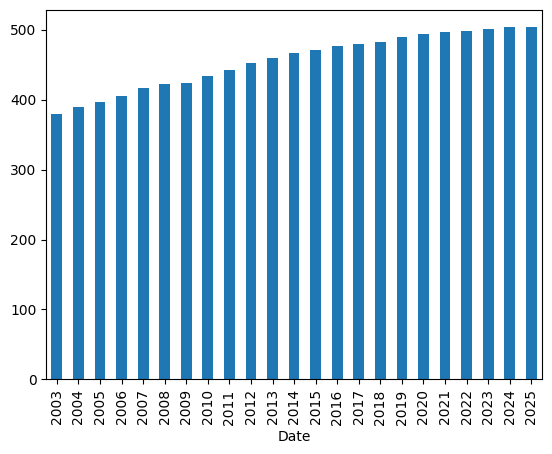

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].min(), df['Date'].max())
df.groupby(df['Date'].dt.year)['Ticker'].nunique().plot(kind='bar')


In [9]:
df["vol_change"].head()

19    0.665267
20   -0.344424
21   -0.117260
22   -0.425710
23    1.259332
Name: vol_change, dtype: float64

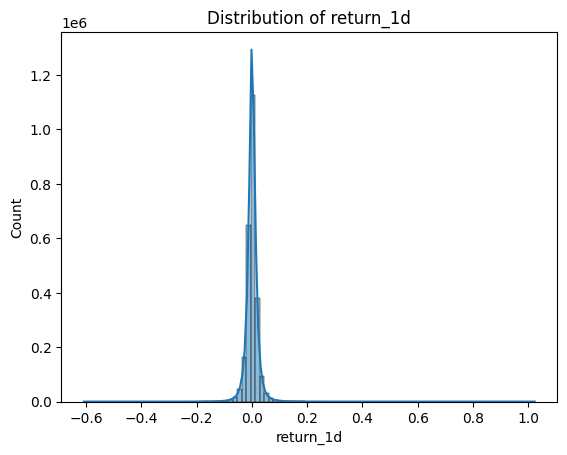

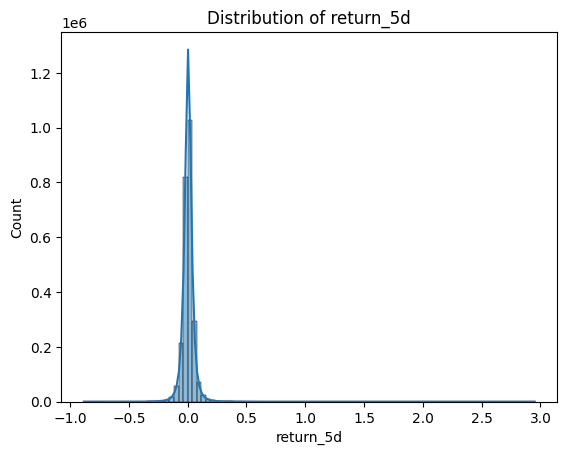

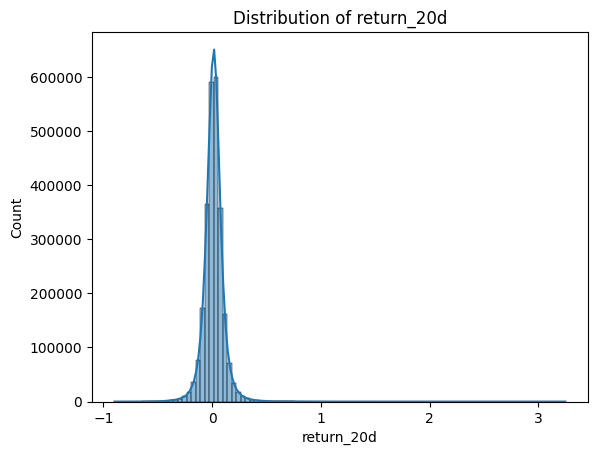

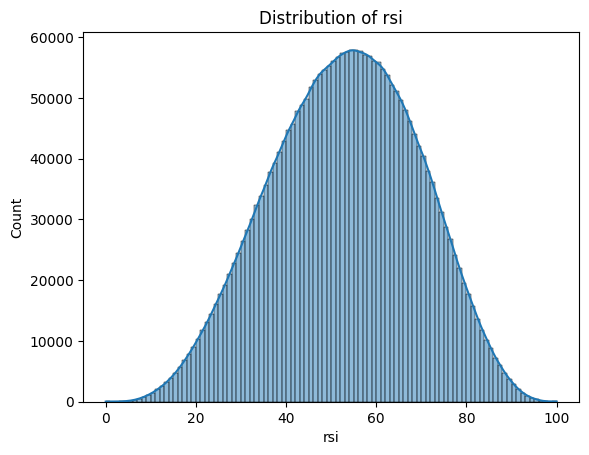

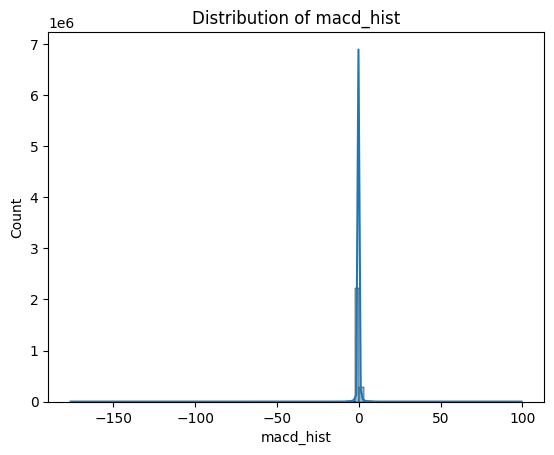

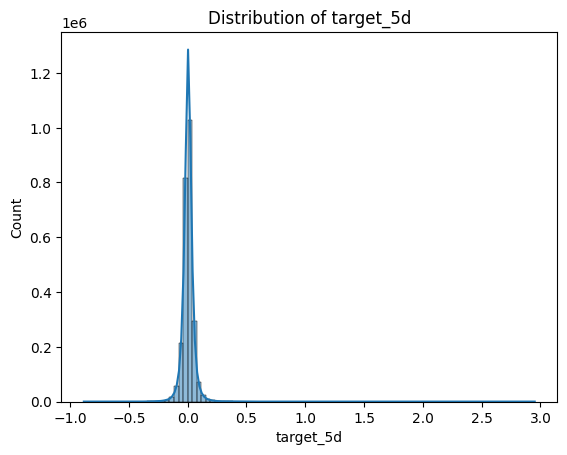

In [8]:
features = ['return_1d','return_5d','return_20d','rsi','macd_hist','target_5d']
for f in features:
    sns.histplot(df[f], bins=100, kde=True)
    plt.title(f"Distribution of {f}")
    plt.show()

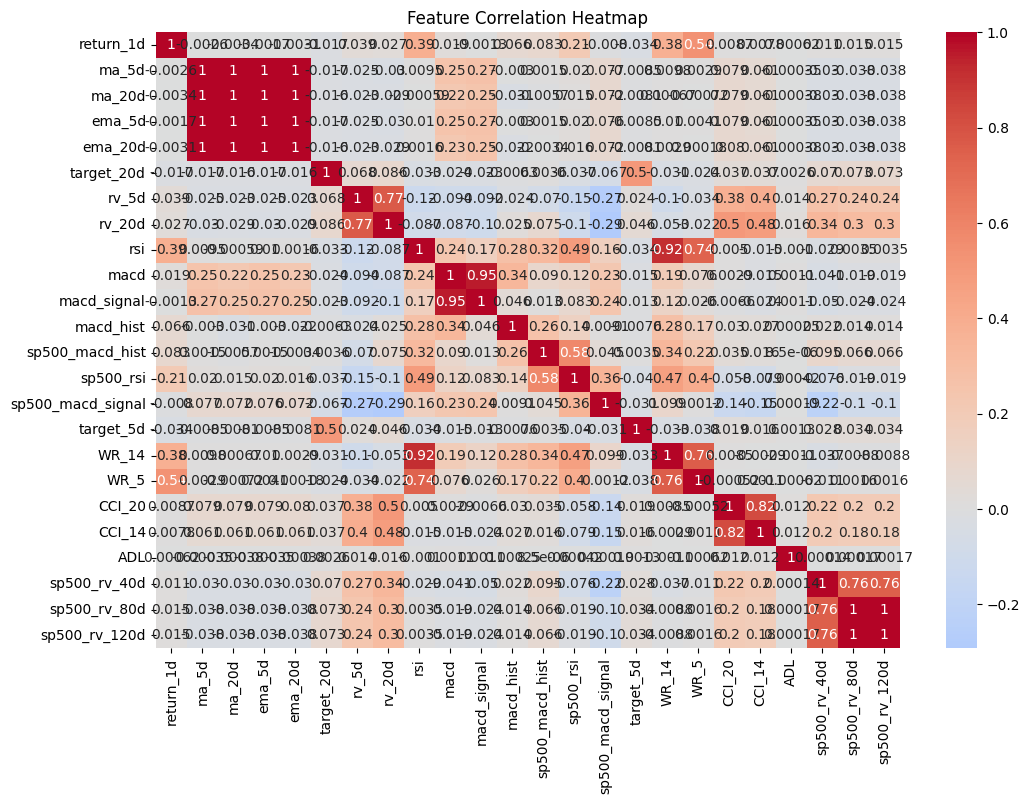

In [17]:
corr = df[['return_1d','ma_5d','ma_20d','ema_5d','ema_20d',"target_20d",
           'rv_5d','rv_20d','rsi','macd','macd_signal','macd_hist', 'sp500_macd_hist','sp500_rsi','sp500_macd_signal',
           'target_5d',"WR_14","WR_5","CCI_20","CCI_14","ADL", "sp500_rv_40d","sp500_rv_80d","sp500_rv_120d"]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, )
plt.title("Feature Correlation Heatmap")
plt.show()


<Figure size 1000x800 with 0 Axes>

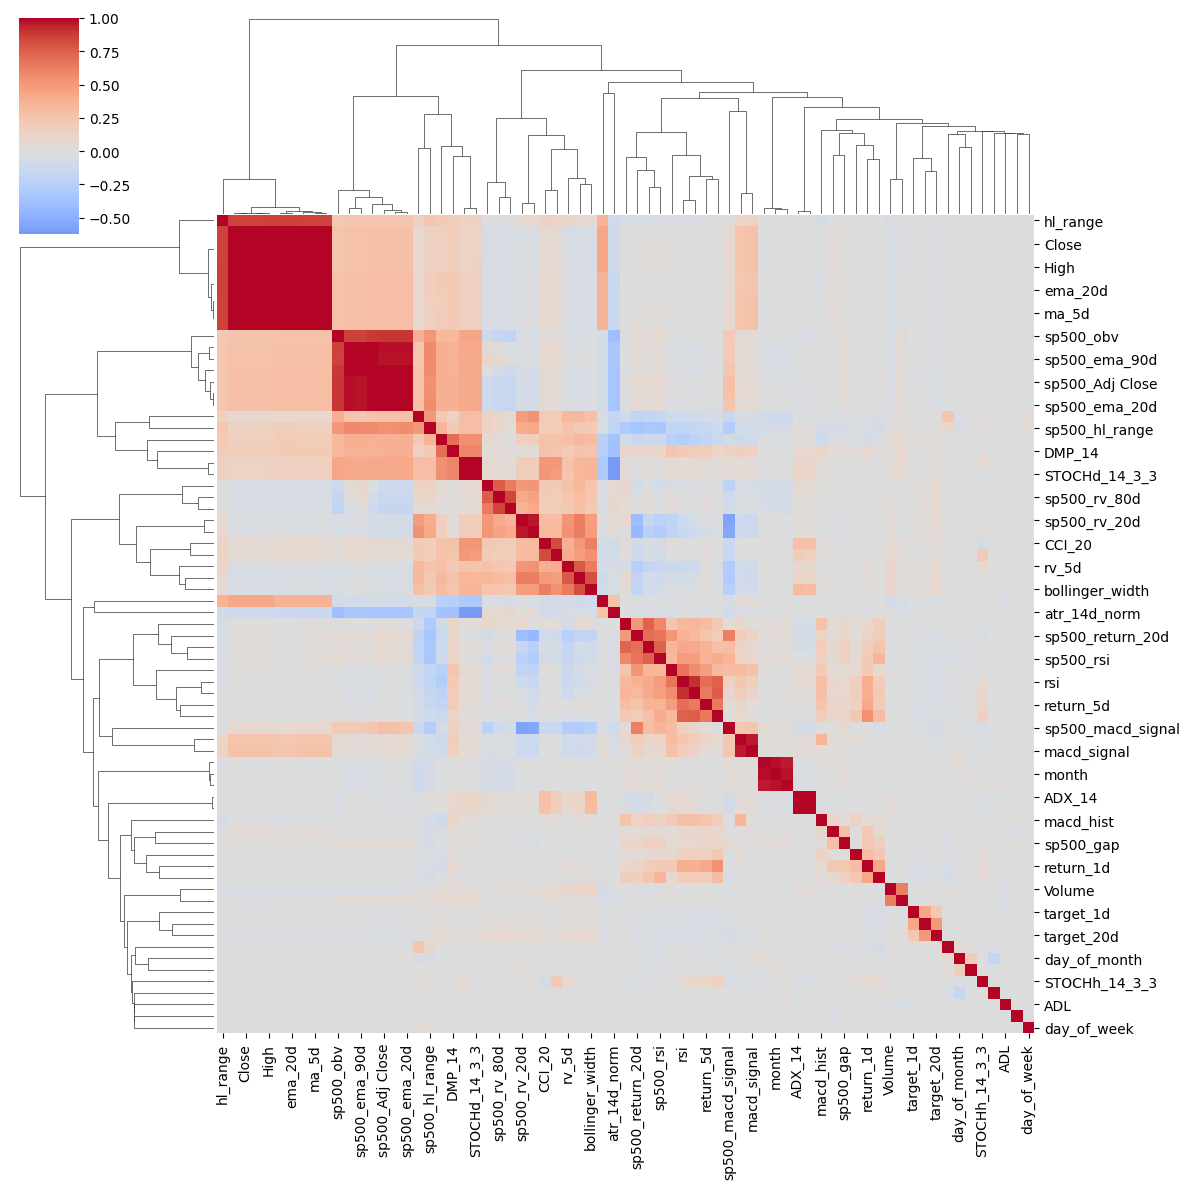

In [6]:
num=df.select_dtypes(include=[np.number])
corr=num.corr()
plt.figure(figsize=(10,8))
sns.clustermap(corr, cmap="coolwarm", center=0, figsize=(12,12))
plt.show()

<Figure size 1200x800 with 0 Axes>

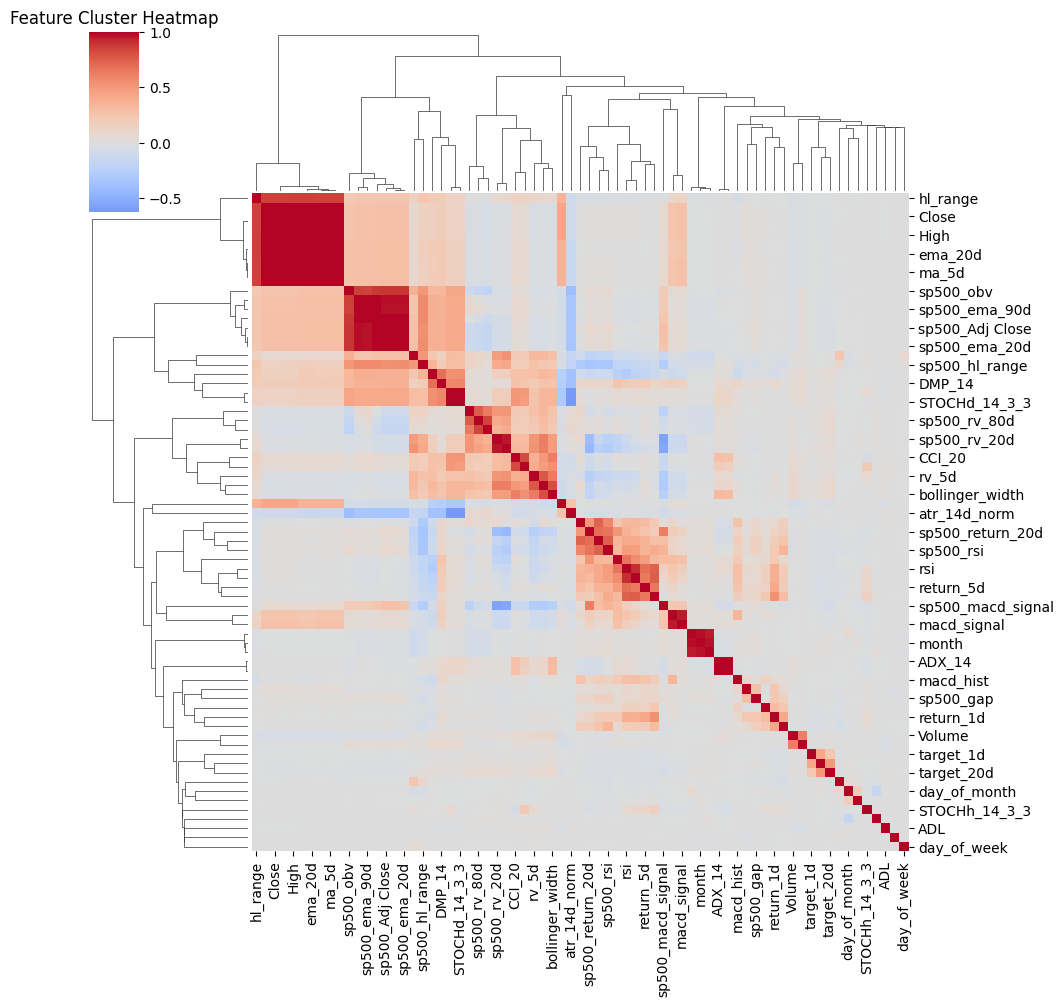

In [10]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12,8))
sns.clustermap(corr, cmap='coolwarm', center=0, )
plt.title("Feature Cluster Heatmap")
plt.show()